In [36]:
!pip install sastrawi


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Collecting Data

In [3]:
!pip install google-play-scraper


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from google_play_scraper import app, reviews

In [ ]:
from google_play_scraper import reviews, Sort

app_id = 'com.zalora.android'

def get_reviews(app_id, lang='id', count=5000, sort=Sort.NEWEST, filter_score_with=None, filter_device_with=None, continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=sort,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,
            continuation_token=continuation_token
        )
        return result, continuation_token
    except Exception as e:
        print("Error:", e)
        return None, None

reviews, continuation_token = get_reviews(app_id)

if reviews is not None:
    print("Jumlah ulasan:", len(reviews))
    if len(reviews) > 0:
        print("Contoh ulasan:")
        print(reviews[0])
else:
  print("Tidak dapat mengambil ulasan.")

Jumlah ulasan: 2336
Contoh ulasan:
{'reviewId': '66986454-6a5e-47d3-83e6-cc742a7c6da4', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'content': 'bagus', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': '7.25.603', 'at': datetime.datetime(2025, 6, 3, 13, 54, 35), 'replyContent': None, 'repliedAt': None, 'appVersion': '7.25.603'}


In [ ]:
from deep_translator import GoogleTranslator

def export_to_csv(reviews, file_name="zalora.csv"):
    if reviews:
        data = {
            "Review Text": [review["content"] for review in reviews]
        }
        df = pd.DataFrame(data)
        df.to_csv(file_name, index=False)
        print(f"Data berhasil diekspor ke '{file_name}'")
    else:
        print("Tidak ada data ulasan untuk diekspor.")

export_to_csv(reviews)

# Explore Data

In [49]:
df = pd.read_csv('./data/zalora_ulasan.csv')
df

,Review Text
0,good
1,best
2,disini banyak diskon
3,Sangat memuaskan
4,keren
...,...
4995,ok
4996,memuaskan
4997,Bagus bebas untuk pilihan produk
4998,terbaik


In [50]:
print('Ukuran Dataset :', df.shape)
print('Kolom :', df.columns)

Ukuran Dataset : (5000, 1)
Kolom : Index(['Review Text'], dtype='object')


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [31]:
kolom_hapus = ['Review ID', 'Username', 'Rating', 'Date;']
df = df.drop(kolom_hapus, axis=1)

df.head(10)

,Review Text
0,NaN
1,NaN
2,NaN
3,NaN
4,min introgasi di pt jiale imdonesia garmenr pa...
5,NaN
6,membantu kita untuk mencari fashion yg sesuai ...
7,buat yg ga punya waktu dan ga suka antri cocok...
8,NaN
9,apps nya jelek. mw liat kaos UT aja bgg cariny...


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [53]:
df.dropna()

,Review Text
0,good
1,best
2,disini banyak diskon
3,Sangat memuaskan
4,keren
...,...
4995,ok
4996,memuaskan
4997,Bagus bebas untuk pilihan produk
4998,terbaik


In [54]:
df.duplicated().sum()

1385

In [55]:
df.drop_duplicates(keep = 'first', inplace = True)

In [56]:
df['Review Text'] = df['Review Text'].fillna('')

In [57]:
# Ganti string kosong atau spasi dengan NaN
df['Review Text'] = df['Review Text'].replace(r'^\s*$', None, regex=True)

In [58]:
# Hapus baris dengan NaN di kolom 'Review'
df = df.dropna(subset=['Review Text'])

In [59]:
df.duplicated().sum()

0

In [60]:
df.isna().sum()

Review Text    0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3615 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  3615 non-null   object
dtypes: object(1)
memory usage: 56.5+ KB


In [62]:
df.shape

(3615, 1)

In [63]:
file_path = './data/hasilEDA_zalora.csv'

# Simpan DataFrame ke dalam file CSV
df.to_csv(file_path, index=False)

# Peprocessing Data
- Cleaning
- Case Folding
- Tokenizing
- Negation Handling
- Stopword Removal
- Normalizing
- Stemming

In [99]:
df = pd.read_csv('./data/hasilEDA_zalora.csv')
df

,Review Text
0,good
1,best
2,disini banyak diskon
3,Sangat memuaskan
4,keren
...,...
3610,pilihan barangnya buaaaanyak .... 👍👍
3611,puas belanjanya
3612,"aplikasinya bagus untuk berbelanja online,..."
3613,Bagus bebas untuk pilihan produk


## Cleaning

In [4]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
#cleaning
import re
import emoji

def remove_URL(text):
    if text is not None and isinstance(text, str):
        url = re.compile(r"https?://\S+|www\.\S+")
        return url.sub(r'', text)
    else:
        return text

def remove_html(text):
    if text is not None and isinstance(text, str):
        html = re.compile(r"<.*?>")
        return html.sub(r'', text)
    else:
        return text

def remove_emoji(text):
    if text is not None and isinstance(text, str):
        return emoji.replace_emoji(text, replace='')
    return text

def remove_symbols(text):
    if text is not None and isinstance(text, str):
        text = re.sub(r"[^A-Za-z0-9\s]", " ", text)
    return text

def remove_numbers(text):
    if text is not None and isinstance(text, str):
        text = re.sub(r"\d", " ", text)
    return text

def remove_punctuation(text):
    if text is not None and isinstance(text, str):
        text = re.sub(r"[^\w\s]", " ", text)
    return text

def remove_extra_whitespace(text):
    if text is not None and isinstance(text, str):
        text = re.sub(r"\s+", " ", text).strip()
    return text

In [100]:
df["cleaning"] = df["Review Text"].apply(lambda x: remove_URL(x))
df["cleaning"] = df["cleaning"].apply(lambda x: remove_html(x))
df["cleaning"] = df["cleaning"].apply(lambda x: remove_emoji(x))
df["cleaning"] = df["cleaning"].apply(lambda x: remove_symbols(x))
df["cleaning"] = df["cleaning"].apply(lambda x: remove_numbers(x))
df["cleaning"] = df["cleaning"].apply(lambda x: remove_punctuation(x))
df["cleaning"] = df["cleaning"].apply(lambda x: remove_extra_whitespace(x))
df.head(5)

,Review Text,cleaning
0,good,good
1,best,best
2,disini banyak diskon,disini banyak diskon
3,Sangat memuaskan,Sangat memuaskan
4,keren,keren


## Case Folding

In [17]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

In [101]:
df["case_folding"] = df["cleaning"].apply(case_folding)
df.head(5)

,Review Text,cleaning,case_folding
0,good,good,good
1,best,best,best
2,disini banyak diskon,disini banyak diskon,disini banyak diskon
3,Sangat memuaskan,Sangat memuaskan,sangat memuaskan
4,keren,keren,keren


## Tokenizing

In [ ]:
import nltk
nltk.download('punkt_tab')

def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [102]:
df["tokenize"] = df["case_folding"].apply(tokenize)
df.head(5)

,Review Text,cleaning,case_folding,tokenize
0,good,good,good,[good]
1,best,best,best,[best]
2,disini banyak diskon,disini banyak diskon,disini banyak diskon,"[disini, banyak, diskon]"
3,Sangat memuaskan,Sangat memuaskan,sangat memuaskan,"[sangat, memuaskan]"
4,keren,keren,keren,[keren]


## Normalization

In [ ]:
'''import shutil
!pip install kaggle


!kaggle datasets download -d fornigulo/kamus-slag

!unzip kamus-slag.zip -d kamus_slag

shutil.move('kamus_slag', '/content/drive/MyDrive/TA/File/kamus_slag')
#shutil.move('kamus-slag.zip', '/content/drive/MyDrive/TA/File/kamus-slag.zip')'''

In [19]:
data_kamus = pd.read_excel('./data/kamuskatabaku.xlsx')

def normalisasi(text, kamus):
    kalimat_final = []
    for kata in text:
        kata_benar = kamus[kamus['tidak_baku'] == kata]['kata_baku'].values
        if len(kata_benar) > 0:
            kalimat_final.append(kata_benar[0])
        else:
            kalimat_final.append(kata)
    return kalimat_final

In [103]:
df['normalize'] = df['tokenize'].apply(lambda x: normalisasi(x, data_kamus))
df.head(5)

,Review Text,cleaning,case_folding,tokenize,normalize
0,good,good,good,[good],[good]
1,best,best,best,[best],[best]
2,disini banyak diskon,disini banyak diskon,disini banyak diskon,"[disini, banyak, diskon]","[disini, banyak, diskon]"
3,Sangat memuaskan,Sangat memuaskan,sangat memuaskan,"[sangat, memuaskan]","[sangat, memuaskan]"
4,keren,keren,keren,[keren],[keren]


## Negation Handling

In [ ]:
import re
import pandas as pd

def negation_handling(text_tokens):
    text = ' '.join(text_tokens)
    text = re.sub(r'\b(tidak|bukan|jangan|belum|tanpa|gak|ga|enggak|tak|kurang)\s+(\w+)', r'tidak_\2', text)
    tokens = text.split()
    return tokens

In [ ]:
df["negation"] = df["normalize"].apply(negation_handling)
df.head(5)

,Review Text,cleaning,case_folding,tokenize,normalize,negation
0,good,good,good,[good],[good],[good]
1,best,best,best,[best],[best],[best]
2,disini banyak diskon,disini banyak diskon,disini banyak diskon,"[disini, banyak, diskon]","[disini, banyak, diskon]","[disini, banyak, diskon]"
3,Sangat memuaskan,Sangat memuaskan,sangat memuaskan,"[sangat, memuaskan]","[sangat, memuaskan]","[sangat, memuaskan]"
4,keren,keren,keren,[keren],[keren],[keren]


## Stopword Removal

In [21]:
stopwords_found_df = pd.read_csv('./data/stopwords_found.csv')
stopwords_found = set(stopwords_found_df['stopword'].dropna().tolist())  # Konversi ke set

# Ambil daftar stopword dari Sastrawi
stop_words_factory = StopWordRemoverFactory()
stop_words_sastrawi = set(stop_words_factory.get_stop_words())

# Gabungkan semua stopword
all_stopwords = stop_words_sastrawi.union(stopwords_found)

# Perbarui StopWordRemover dengan daftar stopword yang digabungkan
stop_words_factory = StopWordRemoverFactory()
stop_words_factory.get_stop_words = lambda: list(all_stopwords)  # Override daftar stopword
stopword_remover = stop_words_factory.create_stop_word_remover()

def remove_stopwords(text):
    if isinstance(text, list):
        text = ' '.join(text)
    cleaned_text = stopword_remover.remove(text)
    cleaned_text = re.sub(r"[^\w\s]", "", cleaned_text)
    tokens = cleaned_text.split()
    return tokens

In [105]:
df['stopword'] = df['negation'].apply(remove_stopwords)
df.head(5)

,Review Text,cleaning,case_folding,tokenize,normalize,negation,stopword
0,good,good,good,[good],[good],[good],[good]
1,best,best,best,[best],[best],[best],[best]
2,disini banyak diskon,disini banyak diskon,disini banyak diskon,"[disini, banyak, diskon]","[disini, banyak, diskon]","[disini, banyak, diskon]","[disini, banyak, diskon]"
3,Sangat memuaskan,Sangat memuaskan,sangat memuaskan,"[sangat, memuaskan]","[sangat, memuaskan]","[sangat, memuaskan]","[sangat, memuaskan]"
4,keren,keren,keren,[keren],[keren],[keren],[keren]


## Stemming

In [22]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    if isinstance(text, list):
        text = ' '.join(text)
    return ' '.join([stemmer.stem(word) for word in text.split()])

In [106]:
df['stemming'] = df['stopword'].apply(stem_text)
df.head(5)

,Review Text,cleaning,case_folding,tokenize,normalize,negation,stopword,stemming
0,good,good,good,[good],[good],[good],[good],good
1,best,best,best,[best],[best],[best],[best],best
2,disini banyak diskon,disini banyak diskon,disini banyak diskon,"[disini, banyak, diskon]","[disini, banyak, diskon]","[disini, banyak, diskon]","[disini, banyak, diskon]",sini banyak diskon
3,Sangat memuaskan,Sangat memuaskan,sangat memuaskan,"[sangat, memuaskan]","[sangat, memuaskan]","[sangat, memuaskan]","[sangat, memuaskan]",sangat muas
4,keren,keren,keren,[keren],[keren],[keren],[keren],keren


In [107]:
df['stemming'] = df['stemming'].replace("", pd.NA)
df = df.dropna(subset=['stemming'])

In [108]:
df.isna().sum()

Review Text     0
cleaning        0
case_folding    0
tokenize        0
normalize       0
negation        0
stopword        0
stemming        0
dtype: int64

In [109]:
df = df.dropna()

In [110]:
data = df

df = pd.DataFrame(data)

file_path = './data/hasilprepro_zalora.csv'

# Simpan DataFrame ke dalam file CSV
df.to_csv(file_path, index=False)

# Labelling

In [111]:
df = pd.read_csv('./data/hasilprepro_uniqlo.csv')

## VADER

In [96]:
!pip install deep-translator


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from deep_translator import GoogleTranslator

def translate_to_english(text):
    try:
        if isinstance(text, str) and text.strip() != "":  # Pastikan teks bukan NaN atau kosong
            translated_text = GoogleTranslator(source='auto', target='en').translate(text)
            return translated_text
        else:
            return text
    except Exception as e:
        return text

df["ENtranslated"] = df["stemming"].apply(translate_to_english)

df.head(5)

In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.8 MB/s eta 0:00:00


In [ ]:
import nltk
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

def label_with_vader(text):
    if isinstance(text, str):
        scores = vader.polarity_scores(text)
        compound_score = scores['compound']
        if compound_score >= 0.05:
            sentiment = "Positif"
        elif compound_score <= -0.05:
            sentiment = "Negatif"
        else:
            sentiment = "Netral"
        return compound_score, sentiment
    return 0.0, "Netral"

# Terapkan pelabelan otomatis
df[["compound_score", "sentimen"]] = df["ENtranslated"].apply(lambda x: pd.Series(label_with_vader(x)))

# Menghitung jumlah sentimen positif, netral, negatif, dan total
jumlah_positif = df[df['sentimen'] == 'Positif'].shape[0]
jumlah_netral = df[df['sentimen'] == 'Netral'].shape[0]
jumlah_negatif = df[df['sentimen'] == 'Negatif'].shape[0]
jumlah_total = df.shape[0]

# Menampilkan hasil
print(f"Jumlah sentimen positif: {jumlah_positif}")
print(f"Jumlah sentimen netral: {jumlah_netral}")
print(f"Jumlah sentimen negatif: {jumlah_negatif}")
print(f"Jumlah sentimen total: {jumlah_total}")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Jumlah sentimen positif: 932
Jumlah sentimen netral: 619
Jumlah sentimen negatif: 175
Jumlah sentimen total: 1726


## After Labeling

In [ ]:
df

,Review Text,cleaning,translated,case_folding,tokenize,normalize,negation,stopword,stemming,score,sentimen
0,Kalau jadi member manfaatnya apa selama ini se...,Kalau jadi member manfaatnya apa selama ini se...,Kalau jadi member manfaatnya apa selama ini se...,kalau jadi member manfaatnya apa selama ini se...,"['kalau', 'jadi', 'member', 'manfaatnya', 'apa...","['kalau', 'jadi', 'member', 'manfaatnya', 'apa...","['kalau', 'jadi', 'member', 'manfaatnya', 'apa...","['kalau', 'jadi', 'member', 'manfaatnya', 'apa...",kalau jadi member manfaat apa lama sepwrtinya ...,-1.0,Negatif
1,Saya sangat suka aplikasi ini,Saya sangat suka aplikasi ini,Saya sangat suka aplikasi ini,saya sangat suka aplikasi ini,"['saya', 'sangat', 'suka', 'aplikasi', 'ini']","['saya', 'sangat', 'suka', 'aplikasi', 'ini']","['saya', 'sangat', 'suka', 'aplikasi', 'ini']","['sangat', 'suka', 'aplikasi']",sangat suka aplikasi,-4.0,Negatif
2,Saya selalu berlangganan di uniqlo.bahannya oke,Saya selalu berlangganan di uniqlo bahannya oke,Saya selalu berlangganan di uniqlo bahannya oke,saya selalu berlangganan di uniqlo bahannya oke,"['saya', 'selalu', 'berlangganan', 'di', 'uniq...","['saya', 'selalu', 'berlangganan', 'di', 'uniq...","['saya', 'selalu', 'berlangganan', 'di', 'uniq...","['selalu', 'berlangganan', 'uniqlo', 'bahannya...",selalu langgan uniqlo bahan oke,1.0,Positif
3,terbaik,terbaik,bagus sekali,bagus sekali,"['bagus', 'sekali']","['bagus', 'sekali']","['bagus', 'sekali']","['bagus', 'sekali']",bagus sekali,-3.0,Negatif
4,sangat nyaman dipakai baik bahan dan model nya,sangat nyaman dipakai baik bahan dan model nya,sangat nyaman dipakai baik bahan dan model nya,sangat nyaman dipakai baik bahan dan model nya,"['sangat', 'nyaman', 'dipakai', 'baik', 'bahan...","['sangat', 'nyaman', 'dipakai', 'baik', 'bahan...","['sangat', 'nyaman', 'dipakai', 'baik', 'bahan...","['sangat', 'nyaman', 'dipakai', 'baik', 'bahan...",sangat nyaman pakai baik bahan model,4.0,Positif
...,...,...,...,...,...,...,...,...,...,...,...
1721,berbelanja lebih menyenangkan krna ada aplikas...,berbelanja lebih menyenangkan krna ada aplikas...,berbelanja lebih menyenangkan krna ada aplikas...,berbelanja lebih menyenangkan krna ada aplikas...,"['berbelanja', 'lebih', 'menyenangkan', 'krna'...","['berbelanja', 'lebih', 'menyenangkan', 'karen...","['berbelanja', 'lebih', 'menyenangkan', 'karen...","['berbelanja', 'lebih', 'menyenangkan', 'ada',...",belanja lebih senang ada aplikasi jadi cek dul...,-2.0,Negatif
1722,Keren nih aplikasi,Keren nih aplikasi,Keren nih aplikasi,keren nih aplikasi,"['keren', 'nih', 'aplikasi']","['keren', 'nih', 'aplikasi']","['keren', 'nih', 'aplikasi']","['keren', 'nih', 'aplikasi']",keren nih aplikasi,-4.0,Negatif
1723,Have a good day at work,Have a good day at work,Semoga harimu menyenangkan di tempat kerja,semoga harimu menyenangkan di tempat kerja,"['semoga', 'harimu', 'menyenangkan', 'di', 'te...","['semoga', 'harimu', 'menyenangkan', 'di', 'te...","['semoga', 'harimu', 'menyenangkan', 'di', 'te...","['semoga', 'harimu', 'menyenangkan', 'tempat',...",moga hari senang tempat kerja,1.0,Positif
1724,Sangat membantu dengan adanya aplikasi ni,Sangat membantu dengan adanya aplikasi ni,Sangat membantu dengan kehadiran aplikasi ini,sangat membantu dengan kehadiran aplikasi ini,"['sangat', 'membantu', 'dengan', 'kehadiran', ...","['sangat', 'membantu', 'dengan', 'kehadiran', ...","['sangat', 'membantu', 'dengan', 'kehadiran', ...","['sangat', 'membantu', 'kehadiran', 'aplikasi']",sangat bantu hadir aplikasi,-8.0,Negatif


In [ ]:
df = df.drop(['Review Text', 'cleaning', 'translated', 'case_folding', 'tokenize', 'normalize', 'negation', 'stopword'], axis=1)
df

,stemming,score,sentimen
0,kalau jadi member manfaat apa lama sepwrtinya ...,-1.0,Negatif
1,sangat suka aplikasi,-4.0,Negatif
2,selalu langgan uniqlo bahan oke,1.0,Positif
3,bagus sekali,-3.0,Negatif
4,sangat nyaman pakai baik bahan model,4.0,Positif
...,...,...,...
1721,belanja lebih senang ada aplikasi jadi cek dul...,-2.0,Negatif
1722,keren nih aplikasi,-4.0,Negatif
1723,moga hari senang tempat kerja,1.0,Positif
1724,sangat bantu hadir aplikasi,-8.0,Negatif


In [ ]:
df['stemming'] = df['stemming'].replace("", pd.NA)
df = df.dropna(subset=['stemming'])

<ipython-input-119-17590d65f481>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemming'] = df['stemming'].replace("", pd.NA)


In [ ]:
df.isna().sum()

,0
stemming,0
score,0
sentimen,0


In [ ]:
df.duplicated().sum()

np.int64(166)

In [ ]:
df.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1510 entries, 0 to 1725
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stemming  1510 non-null   object 
 1   score     1510 non-null   float64
 2   sentimen  1510 non-null   object 
dtypes: float64(1), object(2)
memory usage: 47.2+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_17160\3770660170.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentimen'], palette="coolwarm")


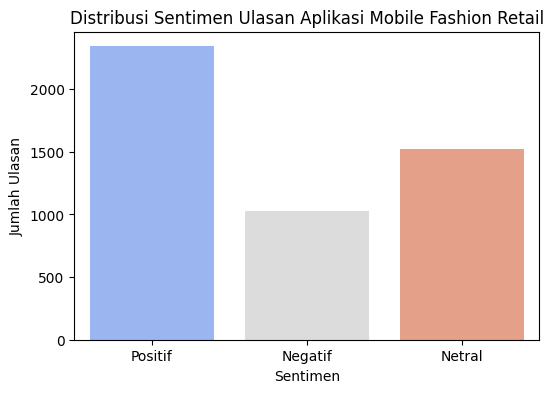

Jumlah sentimen positif: 2342
Jumlah sentimen netral: 1521
Jumlah sentimen negatif: 1026
Jumlah sentimen total: 4889


In [6]:
# Visualisasi distribusi sentimen
import seaborn as sns

df = pd.read_csv('./data/dataset_labeled (5).csv')

plt.figure(figsize=(6, 4))
sns.countplot(x=df['sentimen'], palette="coolwarm")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Ulasan")
plt.title("Distribusi Sentimen Ulasan Aplikasi Mobile Fashion Retail")
plt.show()

# Menghitung jumlah sentimen positif, netral, negatif, dan total
jumlah_positif = df[df['sentimen'] == 'Positif'].shape[0]
jumlah_netral = df[df['sentimen'] == 'Netral'].shape[0]
jumlah_negatif = df[df['sentimen'] == 'Negatif'].shape[0]
jumlah_total = df.shape[0]

# Menampilkan hasil
print(f"Jumlah sentimen positif: {jumlah_positif}")
print(f"Jumlah sentimen netral: {jumlah_netral}")
print(f"Jumlah sentimen negatif: {jumlah_negatif}")
print(f"Jumlah sentimen total: {jumlah_total}")

In [ ]:
data = df

data = pd.DataFrame(data)

file_path = '/content/drive/MyDrive/TA/File/VADER/dataset_labeled (5).csv'

# Simpan DataFrame ke dalam file CSV
df.to_csv(file_path, index=False)

# TF-IDF


In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import joblib

df = pd.read_csv('./data/dataset_labeled (5).csv')

label_mapping = {'Negatif': 0, 'Netral': 1, 'Positif': 2}
df['sentimen'] = df['sentimen'].map(label_mapping)

df.dropna(subset=['stemming'], inplace=True)

X = df['stemming']

# Hitung TF dengan CountVectorizer
count_vectorizer = CountVectorizer()
df_counts = count_vectorizer.fit_transform(X)

# Hitung IDF & TF-IDF dengan TfidfTransformer
tfidf_transformer = TfidfTransformer()
df_tfidf_manual = tfidf_transformer.fit_transform(df_counts)

# Simpan CountVectorizer dan TfidfTransformer
joblib.dump(count_vectorizer, './assets/count_vectorizer.pkl')
joblib.dump(tfidf_transformer, './assets/tfidf_transformer.pkl')

print("Vectorizer dan Transformer berhasil disimpan sebagai .pkl")

y = df['sentimen'].values

Vectorizer dan Transformer berhasil disimpan sebagai .pkl


In [ ]:
# Simpan hasil TF
df_tf_manual = pd.DataFrame(df_counts.toarray(), columns=count_vectorizer.get_feature_names_out())
df_tf_manual.to_csv('./data/hasil_tf_manual.csv', index=False)

# Simpan hasil IDF
idf_values = tfidf_transformer.idf_
df_idf_manual = pd.DataFrame({"Kata": count_vectorizer.get_feature_names_out(), "IDF": idf_values})
df_idf_manual.to_csv('./data/hasil_idf_manual.csv', index=False)

# Simpan hasil TF-IDF
df_tfidf_manual = pd.DataFrame(df_tfidf_manual.toarray(), columns=count_vectorizer.get_feature_names_out())
df_tfidf_manual.to_csv('./data/hasil_tfidf_manual.csv', index=False)

# SMOTE

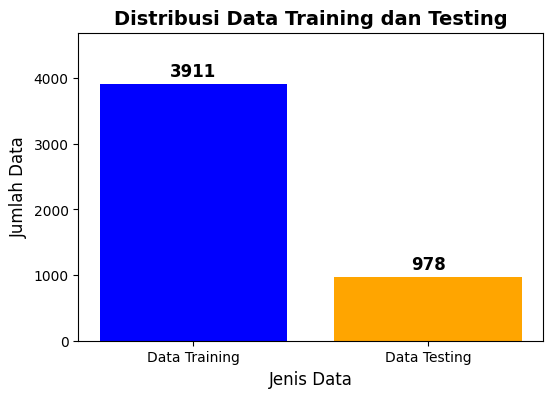

In [22]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = pd.read_csv('./data/hasil_tfidf_manual.csv')
X = X.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [len(X_train), len(X_test)], color=['blue', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, f'{height}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Distribusi Data Training dan Testing', fontsize=14, fontweight='bold')
plt.xlabel('Jenis Data', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.ylim(0, max(len(X_train), len(X_test)) * 1.2)
plt.show()

Sebelum SMOTE:
2    1873
1    1209
0     829
Name: count, dtype: int64

Setelah SMOTE:
1    1873
0    1873
2    1873
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_17160\1060264289.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train_series.value_counts().index, y=y_train_series.value_counts().values, palette="Blues")
C:\Users\HP\AppData\Local\Temp\ipykernel_17160\1060264289.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train_resampled_series.value_counts().index, y=y_train_resampled_series.value_counts().values, palette="Greens")


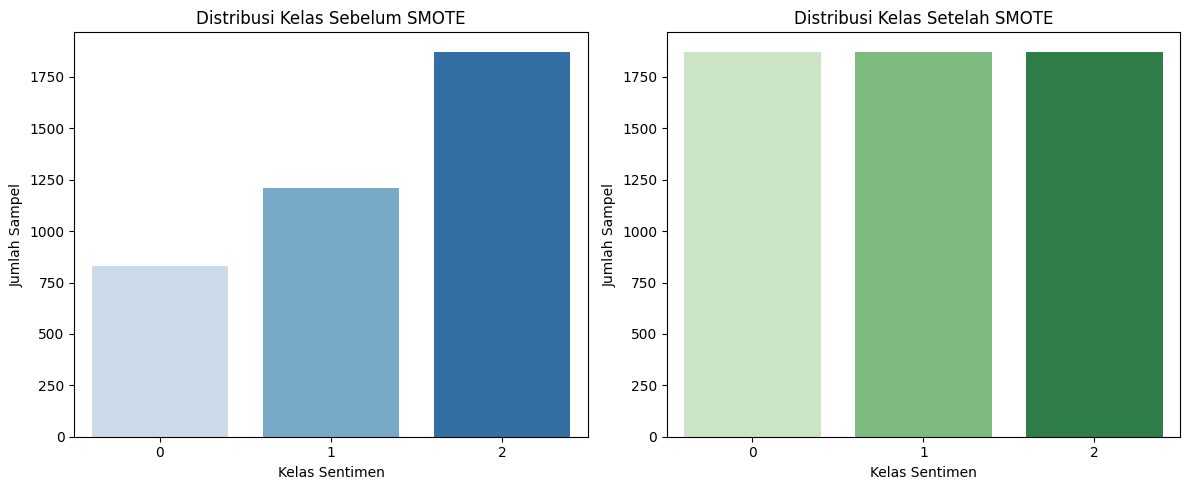

In [23]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

y_train_series = pd.Series(y_train)
y_train_resampled_series = pd.Series(y_train_resampled)
print("Sebelum SMOTE:")
print(y_train_series.value_counts())
print("\nSetelah SMOTE:")
print(y_train_resampled_series.value_counts())

# Sebelum SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=y_train_series.value_counts().index, y=y_train_series.value_counts().values, palette="Blues")
plt.title("Distribusi Kelas Sebelum SMOTE")
plt.xlabel("Kelas Sentimen")
plt.ylabel("Jumlah Sampel")

# Setelah SMOTE
plt.subplot(1, 2, 2)
sns.barplot(x=y_train_resampled_series.value_counts().index, y=y_train_resampled_series.value_counts().values, palette="Greens")
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xlabel("Kelas Sentimen")
plt.ylabel("Jumlah Sampel")

plt.tight_layout()
plt.show()

In [24]:
print(f"Ukuran X_train_resampled: {X_train_resampled.shape}")
print(f"Ukuran y_train_resampled: {y_train_resampled.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_test: {y_test.shape}")

Ukuran X_train_resampled: (5619, 4068)
Ukuran y_train_resampled: (5619,)
Ukuran X_test: (978, 4068)
Ukuran y_test: (978,)


In [ ]:
# Gabungkan X_train_resampled dan y_train_resampled menjadi DataFrame
df_resampled = pd.DataFrame(X_train_resampled)  # Konversi dari sparse matrix jika perlu
df_resampled['label'] = y_train_resampled  # Tambahkan label

# Simpan ke CSV
df_resampled.to_csv('./data/df_resampled.csv', index=False)

# Modelling

## Base Model

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# NB
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)

# SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

# Hybrid
hybrid_model = VotingClassifier(
    estimators=[
        ('nb', nb_model),
        ('svm', svm_model)
    ],
    voting='soft'
)

hybrid_model.fit(X_train_resampled, y_train_resampled)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('svm', SVC(probability=True, random_state=42))],
                 voting='soft')


=== Evaluasi Naïve Bayes ===
Akurasi: 0.7004
Precision: 0.7367
Recall: 0.7004
F1-Score: 0.7033

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.47      0.83      0.60       160
      Netral       0.71      0.49      0.58       282
     Positif       0.83      0.77      0.80       536

    accuracy                           0.70       978
   macro avg       0.67      0.70      0.66       978
weighted avg       0.74      0.70      0.70       978

Confusion Matrix disimpan sebagai confusion_matrix_Naïve_Bayes.png


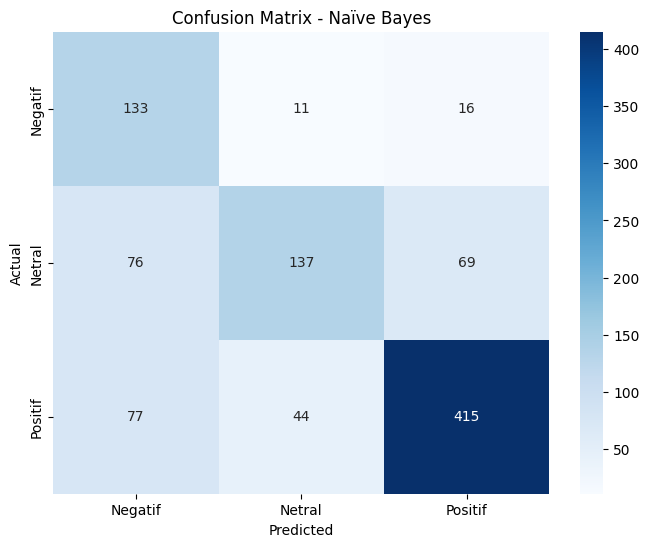


=== Evaluasi SVM ===
Akurasi: 0.7658
Precision: 0.7648
Recall: 0.7658
F1-Score: 0.7653

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.61      0.59      0.60       160
      Netral       0.72      0.71      0.71       282
     Positif       0.84      0.85      0.84       536

    accuracy                           0.77       978
   macro avg       0.72      0.72      0.72       978
weighted avg       0.76      0.77      0.77       978

Confusion Matrix disimpan sebagai confusion_matrix_SVM.png


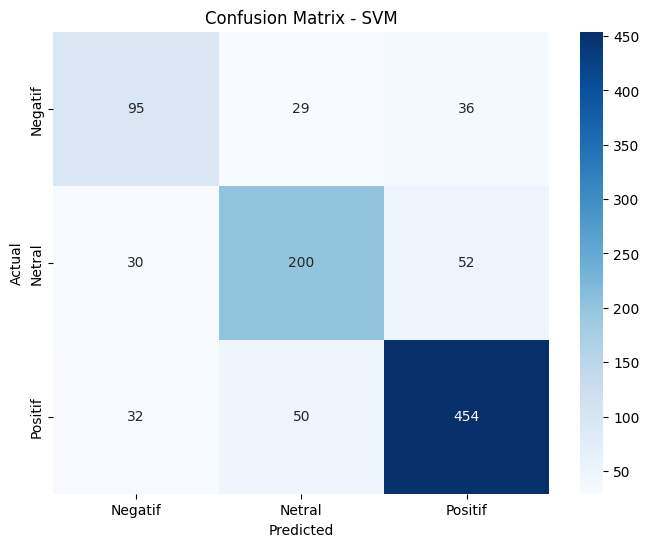


=== Evaluasi Hybrid ===
Akurasi: 0.7648
Precision: 0.7719
Recall: 0.7648
F1-Score: 0.7667

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.58      0.71      0.63       160
      Netral       0.75      0.67      0.71       282
     Positif       0.84      0.83      0.84       536

    accuracy                           0.76       978
   macro avg       0.72      0.74      0.73       978
weighted avg       0.77      0.76      0.77       978

Confusion Matrix disimpan sebagai confusion_matrix_Hybrid.png


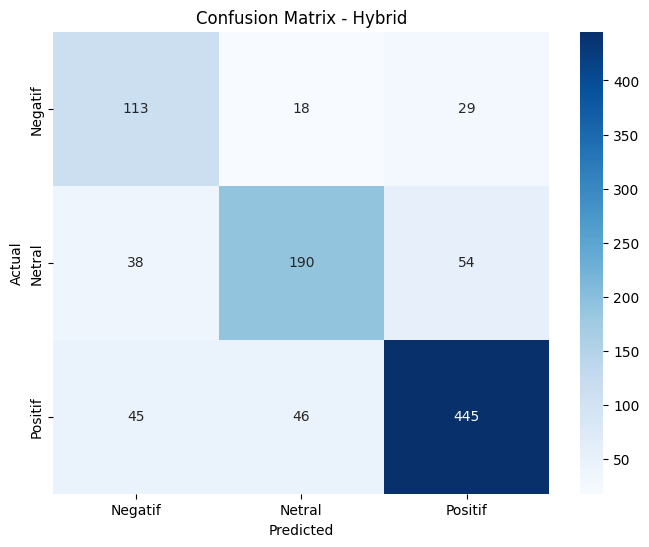

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"\n=== Evaluasi {model_name} ===")
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negatif', 'Netral', 'Positif']))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negatif', 'Netral', 'Positif'],
                yticklabels=['Negatif', 'Netral', 'Positif'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')

    # Simpan gambar
    filename = f"confusion_matrix_{model_name.replace(' ', '_')}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    print(f"Confusion Matrix disimpan sebagai {filename}")

    plt.show()

evaluate_model(nb_model, X_test, y_test, "Naïve Bayes")
evaluate_model(svm_model, X_test, y_test, "SVM")
evaluate_model(hybrid_model, X_test, y_test, "Hybrid")

## Dengan Optimasi

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# NB
nb_params = {'alpha': uniform(0.1, 1)}

nb_random_search = RandomizedSearchCV(
    estimator=MultinomialNB(),
    param_distributions=nb_params,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

nb_random_search.fit(X_train_resampled, y_train_resampled)
best_nb = nb_random_search.best_estimator_

print("Best Naïve Bayes Params:", nb_random_search.best_params_)

# SVM
svm_params = {
    'C': uniform(0.5, 2.0),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

svm_random_search = RandomizedSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_distributions=svm_params,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

svm_random_search.fit(X_train_resampled, y_train_resampled)
best_svm = svm_random_search.best_estimator_

print("Best SVM Params:", svm_random_search.best_params_)

# Hybrid
hybrid_model_optimized = VotingClassifier(
    estimators=[
        ('nb', best_nb),
        ('svm', best_svm)
    ],
    voting='soft',
)

hybrid_model_optimized.fit(X_train_resampled, y_train_resampled)

Best Naïve Bayes Params: {'alpha': 0.12058449429580245}
Best SVM Params: {'kernel': 'linear', 'gamma': 'scale', 'C': 2.23235229154987}


VotingClassifier(estimators=[('nb', MultinomialNB(alpha=0.12058449429580245)),
                             ('svm',
                              SVC(C=2.23235229154987, kernel='linear',
                                  probability=True, random_state=42))],
                 voting='soft', weights=[1, 2])


=== Evaluasi Naïve Bayes ===
Akurasi: 0.7382
Precision: 0.7543
Recall: 0.7382
F1-Score: 0.7358

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.59      0.85      0.70       197
      Netral       0.77      0.55      0.65       312
     Positif       0.81      0.81      0.81       469

    accuracy                           0.74       978
   macro avg       0.72      0.74      0.72       978
weighted avg       0.75      0.74      0.74       978

Confusion Matrix disimpan sebagai confusion_matrix_Naïve_Bayes.png


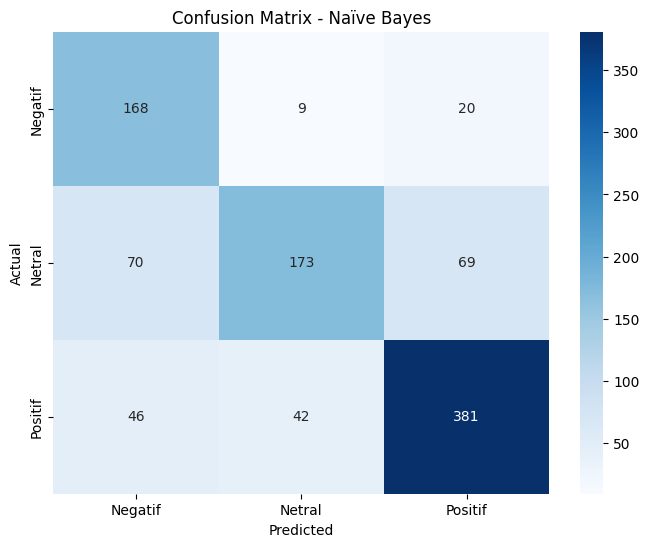


=== Evaluasi SVM ===
Akurasi: 0.8129
Precision: 0.8162
Recall: 0.8129
F1-Score: 0.8139

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.75      0.80      0.77       197
      Netral       0.77      0.79      0.78       312
     Positif       0.88      0.83      0.85       469

    accuracy                           0.81       978
   macro avg       0.80      0.81      0.80       978
weighted avg       0.82      0.81      0.81       978

Confusion Matrix disimpan sebagai confusion_matrix_SVM.png


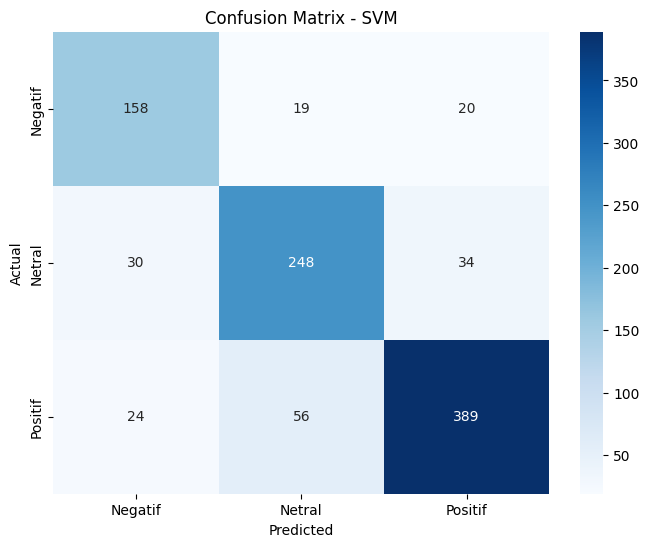


=== Evaluasi Hybrid ===
Akurasi: 0.8200
Precision: 0.8200
Recall: 0.8200
F1-Score: 0.8199

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.78      0.80      0.79       197
      Netral       0.79      0.77      0.78       312
     Positif       0.86      0.86      0.86       469

    accuracy                           0.82       978
   macro avg       0.81      0.81      0.81       978
weighted avg       0.82      0.82      0.82       978

Confusion Matrix disimpan sebagai confusion_matrix_Hybrid.png


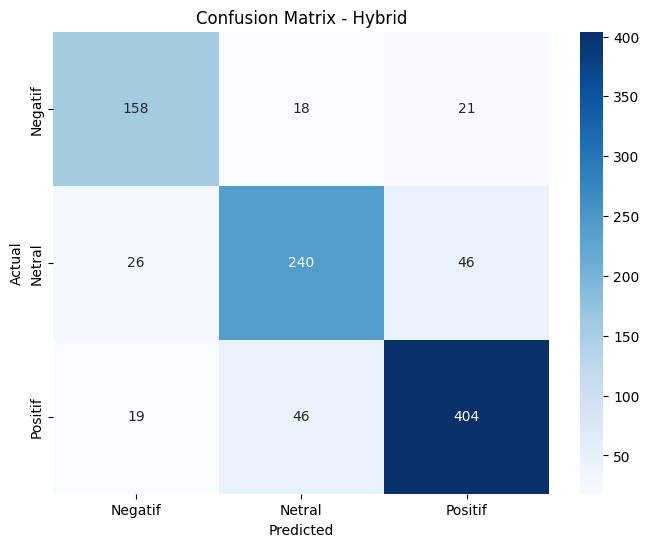

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"\n=== Evaluasi {model_name} ===")
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negatif', 'Netral', 'Positif']))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negatif', 'Netral', 'Positif'],
                yticklabels=['Negatif', 'Netral', 'Positif'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')

    # Simpan gambar
    filename = f"confusion_matrix_{model_name.replace(' ', '_')}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    print(f"Confusion Matrix disimpan sebagai {filename}")

    plt.show()

evaluate_model(best_nb, X_test, y_test, "Naïve Bayes")
evaluate_model(best_svm, X_test, y_test, "SVM")
evaluate_model(hybrid_model_optimized, X_test, y_test, "Hybrid")

In [ ]:
import joblib

joblib.dump(best_nb, "./assets/NEW_optimized_naive_bayes_model.pkl")
joblib.dump(best_svm, "./assets/NEW_optimized_svm_model.pkl")
joblib.dump(hybrid_model_optimized, "./assets/NEW_optimized_hybrid_model.pkl")

print("Model berhasil disimpan!")

Model berhasil disimpan!


## Pengujian

In [ ]:
import joblib
import numpy as np

count_vectorizer = joblib.load("./assets/count_vectorizer.pkl")
tfidf_transformer = joblib.load("./assets/tfidf_transformer.pkl")
model = joblib.load("./assets/NEW_optimized_hybrid_model.pkl")

In [ ]:
def preprocess_text(text):
    text = remove_URL(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = remove_symbols(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = remove_extra_whitespace(text)
    text = case_folding(text)
    text = tokenize(text)
    text = normalisasi(text, data_kamus)
    text = negation_handling(text)
    text = remove_stopwords(text)
    text = stem_text(text)
    return text

def predict_sentiment(text_input):
    global cleaned_text
    if not text_input.strip():
        return "Input tidak boleh kosong!"

    cleaned_text = preprocess_text(text_input)

    text_counts = count_vectorizer.transform([cleaned_text])
    transformed_text = tfidf_transformer.transform(text_counts)

    # Ubah sparse matrix menjadi dense agar kompatibel dengan SVC
    transformed_text_dense = transformed_text.toarray()

    prediction = model.predict(transformed_text_dense)[0]

    probabilities = model.predict_proba(transformed_text_dense)[0]

    label_mapping = {0: "Negatif", 1: "Netral", 2: "Positif"}
    label = label_mapping.get(prediction, "Tidak diketahui")

    # output probabilitas
    prob_output = "\n".join([
        f"{label_mapping[i]}: {prob:.4f}" for i, prob in enumerate(probabilities)
    ])

    return f"Hasil Prediksi: {label}\nProbabilitas:\n{prob_output}"

user_input = input("Masukkan ulasan aplikasi Uniqlo: ")
hasil_prediksi = predict_sentiment(user_input)
print(hasil_prediksi)

Hasil Prediksi: Netral
Probabilitas:
Negatif: 0.1317
Netral: 0.5173
Positif: 0.3510
